In [164]:
# Set Dependencies
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import pandas as pd
import numpy as np
import requests
import time
import json
import gmaps
import os
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
from api_keys import gkey
%matplotlib inline

In [256]:
crime_mdata_to_load = "Crimes April 2018 2019 2020.csv"
crime_mdata = pd.read_csv(crime_mdata_to_load)
#crime_mdata.head(5)

crime_mdata.loc[(crime_mdata['Primary Type'] != 'BURGLARY'),'Primary Type'] = 'NON-BURGLARY'


byYear_Analysis_df = \
    crime_mdata.groupby(["Year", "Primary Type"]).agg(
        Crime_Count=('ID', 'count'))


byYear_Analysis_df.reset_index(inplace=True)

byYear_Analysis_df

,Year,Primary Type,Crime_Count
0,2018,BURGLARY,900
1,2018,NON-BURGLARY,19452
2,2019,BURGLARY,671
3,2019,NON-BURGLARY,19605
4,2020,BURGLARY,506
5,2020,NON-BURGLARY,11800


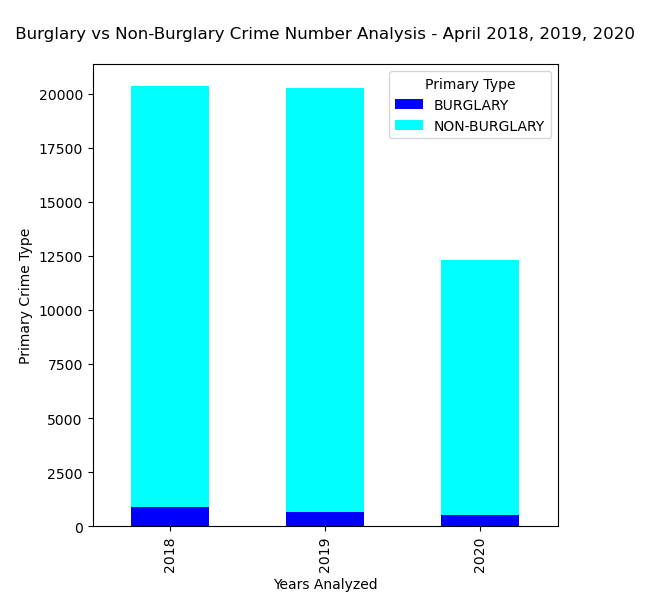

In [253]:
# crime_mdata_to_load = "Crimes April 2018 2019 2020.csv"
# crime_mdata = pd.read_csv(crime_mdata_to_load)
# #crime_mdata.head(5)

# crime_mdata.loc[(crime_mdata['Primary Type'] != 'BURGLARY'),'Primary Type'] = 'NON-BURGLARY'


# byYear_Analysis_df = \
#     crime_mdata.groupby(["Year", "Primary Type"]).agg(
#         Crime_Count=('ID', 'count'))


# byYear_Analysis_df.reset_index(inplace=True)
#byYear_Analysis_df


pivot_df = byYear_Analysis_df.pivot(index='Year', columns = 'Primary Type', values='Crime_Count')

colors = ["blue", "cyan"]
pivot_df.loc[:, ['BURGLARY', 'NON-BURGLARY']].plot.bar(stacked=True, color=colors, figsize = (6,6))

plt.title("\n Burglary vs Non-Burglary Crime Number Analysis - April 2018, 2019, 2020 \n")

plt.xlabel("Years Analyzed")
plt.ylabel("Primary Crime Type")


plt.savefig("primaryCrimeApril_2018_2019_2020.png")



In [199]:
crime_data_to_load = "CrimesApril_2018_2019_2020_Burglary.csv"
crime_data = pd.read_csv(crime_data_to_load)
clean_crime_data = crime_data.dropna()
clean_crime_data.head(5)

,ID,Date,HrOfDate,Primary Type,Description,Location Description,Year,Latitude,Longitude
0,11663572,4/20/2019 4:52,4,BURGLARY,FORCIBLE ENTRY,DRUG STORE,2019,41.925174,-87.666509
1,11671838,4/25/2019 9:00,9,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,2019,42.006048,-87.702193
2,11694868,4/28/2019 18:00,18,BURGLARY,FORCIBLE ENTRY,APARTMENT,2019,41.865509,-87.716614
3,11664894,4/23/2019 9:30,9,BURGLARY,FORCIBLE ENTRY,RESIDENCE,2019,41.890301,-87.763386
4,11695741,4/22/2019 16:00,16,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,2019,41.694046,-87.653366


In [ ]:
# #No need to rerun API call *
# #Google Reverse Geocoding API

# find_zip = clean_crime_data.copy()

# find_zip["zipcode"]=""

# base_url= "https://maps.googleapis.com/maps/api/geocode/json?"

# for i in find_zip.index:
#     lat = float(find_zip["Latitude"][i])
#     lng = float(find_zip["Longitude"][i])
    

#     params = {
#             "latlng": f"{lat},{lng}",
#             "result_type" : "postal_code",
#             "key": gkey
#     }

#     response = requests.get(base_url, params=params).json()
#     results = response['results']

#     try:   
#         find_zip.loc[i, "zipcode"] = results[0]['address_components'][0]['short_name']
#     #print(f"{findzip[0]['address_components'][0]['short_name']}")(CrimePropertyApril2019_2020)

#     except (KeyError, IndexError):
#        # print("Missing field/result... skipping.")
#         pass
    
# find_zip.head()




In [ ]:
# Use output from Google Reverse Geocoding API call above as input
find_zip.to_csv('zip_crime_data_2020.csv')

In [76]:
# Read Crime_property data Brian has prepared

crime_property_file = "CrimePropertyApril2019_2020.csv"
crime_property_df = pd.read_csv(crime_property_file)
crime_property_df.fillna(0, inplace=True)

crime_property_df.head()


,ID,Date,HrOfDate,Primary Type,Description,Location Description,Year,Latitude,Longitude,zipcode,City,CountyName,PropertyValue
0,11800832,4/1/2019 8:00,8,BURGLARY,FORCIBLE ENTRY,RESIDENCE,2019,41.765927,-87.680741,60636,Chicago,Cook County,55518
1,11642757,4/2/2019 7:00,7,BURGLARY,FORCIBLE ENTRY,RESIDENCE,2019,41.765705,-87.674611,60636,Chicago,Cook County,55518
2,11644212,4/3/2019 11:35,11,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,2019,41.784137,-87.661904,60636,Chicago,Cook County,55518
3,11646224,4/6/2019 2:00,2,BURGLARY,FORCIBLE ENTRY,RESIDENCE,2019,41.772206,-87.663158,60636,Chicago,Cook County,55518
4,11654927,4/12/2019 18:30,18,BURGLARY,FORCIBLE ENTRY,RESIDENCE,2019,41.775090,-87.667773,60636,Chicago,Cook County,55518


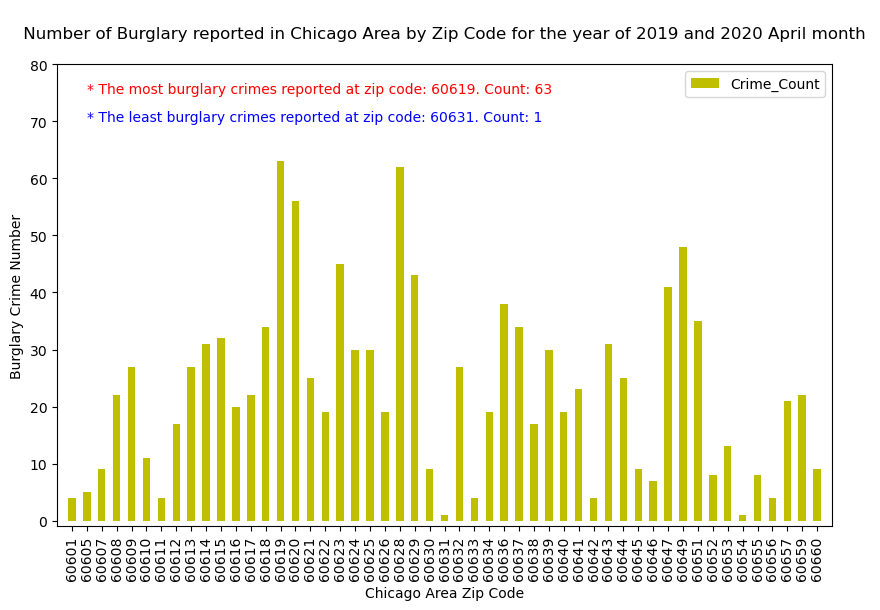

In [134]:
# Prepare crime vs property value data set

byZip_Analysis_df = \
    crime_property_df.groupby("zipcode").agg(
        Crime_Count=('ID', 'count'))

# byZip_Analysis_df.reset_index(inplace=True)

max_index = byZip_Analysis_df['Crime_Count'].idxmax()
      
max_count = byZip_Analysis_df['Crime_Count'].max()

min_index = byZip_Analysis_df['Crime_Count'].idxmin()
      
min_count = byZip_Analysis_df['Crime_Count'].min()
      
byZip_bar = byZip_Analysis_df.plot(kind='bar', color = 'y', figsize=(10, 6))
byZip_bar.set_xlabel("Chicago Area Zip Code")
byZip_bar.set_ylabel("Burglary Crime Number")

plt.title("\n Number of Burglary reported in Chicago Area by Zip Code for the year of 2019 and 2020 April month \n")

# print(f"* Chicago zip code: {max_index} has the most burglary number of {max_count}\n")
# print(f"** Chicago zip code: {min_index} has the least burglary number of {min_count}\n")

plt.xlim([-1,51])
plt.ylim([-1,80])

msg_max = f"* The most burglary crimes reported at zip code: {max_index}. Count: {max_count}"

msg_min = f"* The least burglary crimes reported at zip code: {min_index}. Count: {min_count}"


plt.annotate(msg_max,(1,75),fontsize=10,color="red")

plt.annotate(msg_min,(1,70),fontsize=10,color="blue")


plt.show()
plt.tight_layout()


plt.savefig('CrimeNum_byZip.png')


In [48]:
# Define bins by Property Value ranges
bins = [0, 100000, 200000, 300000, 400000, 500000, 1000000, 2000000]
group_names = ["<100000", "100000-200000", "200000-300000", "300000-400000", "400000-500000","500000-1000000", ">1000000"]

In [84]:
crime_byPropRange_df = crime_property_df.copy()

crime_byPropRange_df['PropertyRanges'] = pd.cut(crime_property_df['PropertyValue'], bins, labels=group_names, include_lowest=True)

crime_byPropRange_df.head()
#property_num = crime_property_df['PropertyRanges'].value_counts()


crime_byPropRange_df =\
    crime_byPropRange_df.groupby(['Year', 'PropertyRanges']).agg(
        crime_cnt = ('ID', 'count'))

crime_byPropRange_df = crime_byPropRange_df.reset_index()


,Year,PropertyRanges,crime_cnt
0,2019,<100000,40
1,2019,100000-200000,292
2,2019,200000-300000,67
3,2019,300000-400000,71
4,2019,400000-500000,41
5,2019,500000-1000000,129
6,2019,>1000000,23


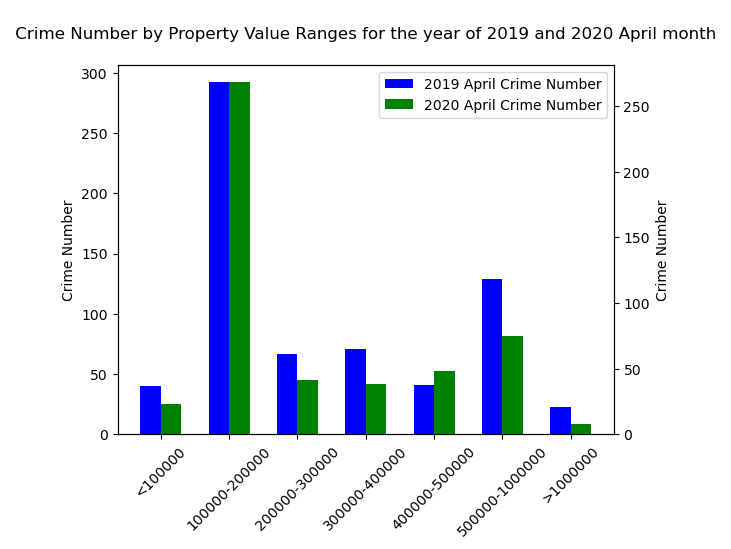

In [257]:
crime_byPropRange_df_2019 = crime_byPropRange_df.loc[crime_byPropRange_df['Year']==2019]

crime_byPropRange_df_2020 = crime_byPropRange_df.loc[crime_byPropRange_df['Year']==2020]

# Avg_Property_Val = crime_property_df["PropertyValue"].mean()
# Med_Property_Val = crime_property_df["PropertyValue"].median()

x = np.arange(7)
ax1 = plt.subplot(1,1,1)
w = 0.3
# plt.xticks(), will label the bars on x axis with the respective property value ranges.
# 2019 crimes
plt.xticks(x + w /2, crime_byPropRange_df_2019['PropertyRanges'], rotation=45)
crime_cnt_2019 =ax1.bar(x, crime_byPropRange_df_2019['crime_cnt'], width=w, color='b', align='center')
plt.ylabel('Crime Number')
# The trick is to use two different axes that share the same x axis, use ax1.twinx() method.
ax2 = ax1.twinx()
# 2020 crimes
crime_cnt_2020 =ax2.bar(x + w, crime_byPropRange_df_2020['crime_cnt'], width=w,color='g',align='center')
# Set the Y axis label
plt.ylabel('Crime Number')
#To set the legend on the plot we have used plt.legend()
plt.legend([crime_cnt_2019, crime_cnt_2020],['2019 April Crime Number', '2020 April Crime Number'])

plt.title("\n Crime Number by Property Value Ranges for the year of 2019 and 2020 April month \n")

#To show the plot finally we have used plt.show().
# plt.show()

plt.savefig('April 2019 vs 2020 crimenum vs property ranges.png')

In [162]:
zip_crime_byAvgProp_df = crime_property_df.copy()

zip_crime_byAvgProp_df =\
    zip_crime_byAvgProp_df.groupby(['Year', 'zipcode']).agg(
        crime_cnt = ('ID', 'count'),
        avg_prop = ('PropertyValue', 'mean'))

zip_crime_byAvgProp_df = zip_crime_byAvgProp_df.reset_index()


,Year,zipcode,crime_cnt,avg_prop
0,2019,60601,4,406040
1,2019,60605,3,623557
2,2019,60607,2,570186
3,2019,60608,14,288308
4,2019,60609,15,173347
...,...,...,...,...
94,2020,60655,3,248961
95,2020,60656,2,314120
96,2020,60657,4,961129
97,2020,60659,12,365862


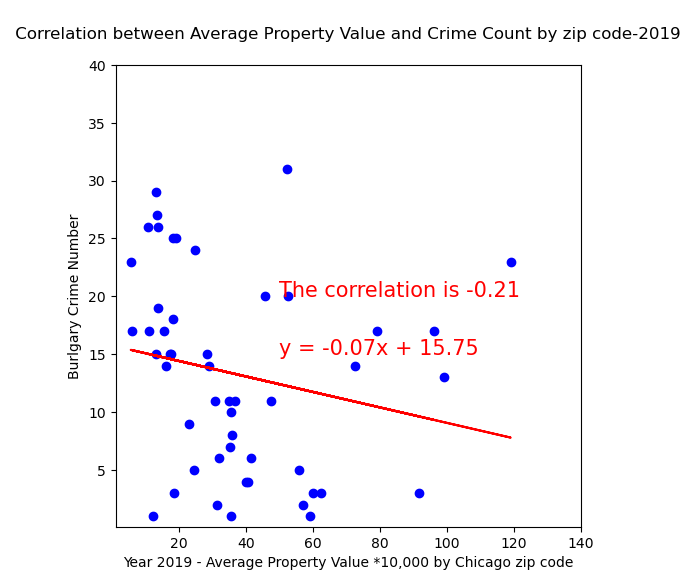

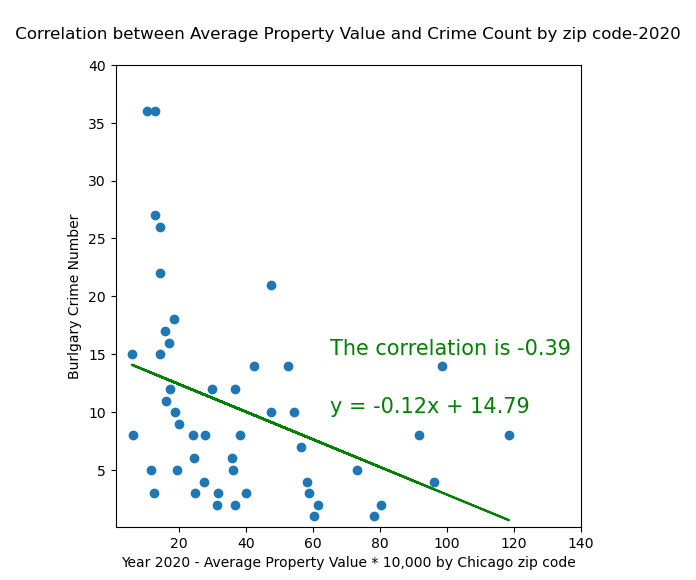

In [198]:
# Scatter Plots to analyze correlation between crime number and propery value

zip_crime_byAvgProp_df_2019 = zip_crime_byAvgProp_df.loc[zip_crime_byAvgProp_df['Year']==2019]

# Add the linear regression equation and line to plot

x1_values = zip_crime_byAvgProp_df_2019['avg_prop']/10000

y1_values = zip_crime_byAvgProp_df_2019['crime_cnt']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)

regress_values1 = x1_values * slope + intercept

line_eq1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson correlation 
correlation1 = st.pearsonr(x1_values, y1_values)

cor_msg1 =f"The correlation is {round(correlation1[0],2)}"

#ax = plt.gca()

plt.style.use('default')

plt.figure(figsize=(6,6))

plt.scatter(x1_values,y1_values, color = 'b')

plt.plot(x1_values,regress_values1,"r-")

plt.xlim([1,140])
plt.ylim([0.1,40])

plt.annotate(line_eq1,(50,15),fontsize=15,color="red")
plt.annotate(cor_msg1,(50,20),fontsize=15,color="red")
plt.title("\n Correlation between Average Property Value and Crime Count by zip code-2019 \n")
plt.xlabel('Year 2019 - Average Property Value *10,000 by Chicago zip code')
plt.ylabel("Burlgary Crime Number")

plt.savefig('CrimeNumber_AvgProperty_byZip2019.png')
#plt.show()
#############################################################################################
# Add the linear regression equation and line to plot

zip_crime_byAvgProp_df_2020 = zip_crime_byAvgProp_df.loc[zip_crime_byAvgProp_df['Year']==2020]

x2_values = zip_crime_byAvgProp_df_2020['avg_prop']/10000

y2_values = zip_crime_byAvgProp_df_2020['crime_cnt']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x2_values, y2_values)

regress_values2 = x2_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson correlation 
correlation2 = st.pearsonr(x2_values, y2_values)

cor_msg2 =f"The correlation is {round(correlation2[0],2)}"

plt.style.use('default')

plt.figure(figsize=(6,6))

plt.scatter(x2_values,y2_values)

plt.plot(x2_values,regress_values2,"g-")

plt.xlim([1,140])
plt.ylim([0.1,40])

plt.annotate(line_eq2,(65,10),fontsize=15,color="green")
plt.annotate(cor_msg2,(65,15),fontsize=15,color="green")
plt.title("\n Correlation between Average Property Value and Crime Count by zip code-2020 \n")
plt.xlabel('Year 2020 - Average Property Value * 10,000 by Chicago zip code')
plt.ylabel("Burlgary Crime Number")

#plt.show()

plt.savefig('CrimeNumber_AvgProperty_byZip2020.png')

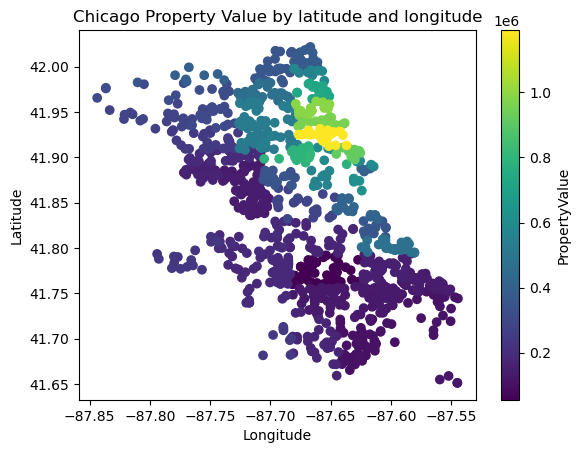

In [258]:
# Plot the latitude and longitude of the Chicago Property Value as reference

plt.scatter(crime_property_df['Longitude'],crime_property_df['Latitude'],c=crime_property_df['PropertyValue'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("PropertyValue")
plt.title("Chicago Property Value by latitude and longitude")
# plt.show()
plt.savefig("Lat_Lng_Property.png")